In [99]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, transpile
from qiskit.providers.aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
import numpy as np

In [119]:
set = QuantumRegister(1, name="set")
last_state = QuantumRegister(1, name="last")
ancilla = QuantumRegister(1, name="ancilla")
reset = QuantumRegister(1, name="reset")

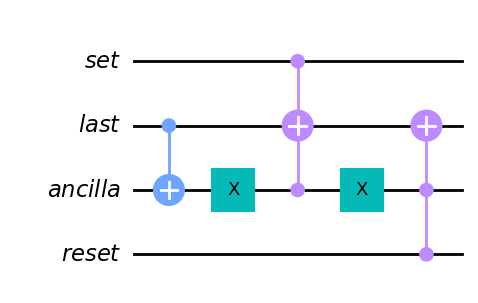

In [120]:
flip_flop = QuantumCircuit(set, last_state, ancilla, reset)

flip_flop.cx(last_state, ancilla)

flip_flop.x(ancilla)
flip_flop.ccx(set, ancilla, last_state)
flip_flop.x(ancilla)

flip_flop.ccx(reset, ancilla, last_state)
flip_flop.draw("mpl")

In [101]:
FFRS = flip_flop.to_gate(label="FF-RS")

In [70]:
sim = Aer.get_backend('aer_simulator')
ff_copy = flip_flop.copy()
ff_copy.save_unitary()
unitary = sim.run(ff_copy).result().get_unitary()
display(array_to_latex(unitary, max_size=9999))

<IPython.core.display.Latex object>

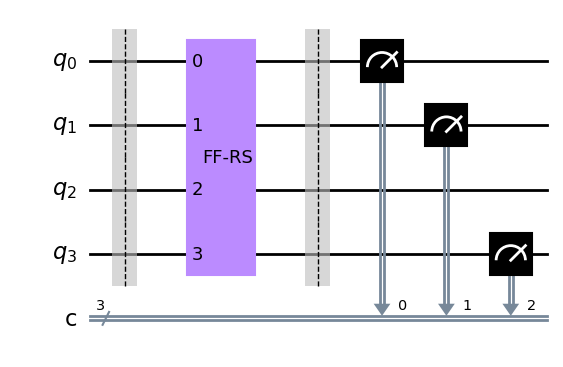

set -->  0  last -->  0  reset -->  0  counts -->  {'000': 1024}


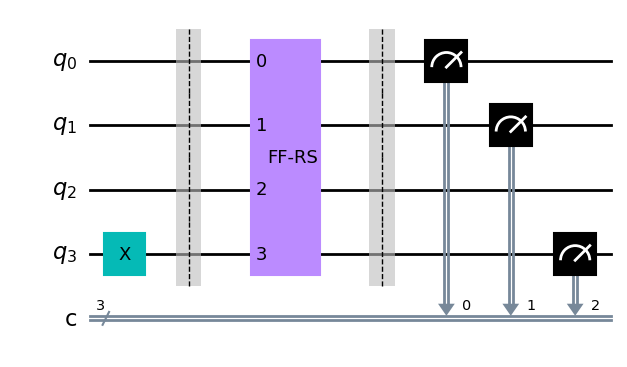

set -->  0  last -->  0  reset -->  1  counts -->  {'100': 1024}


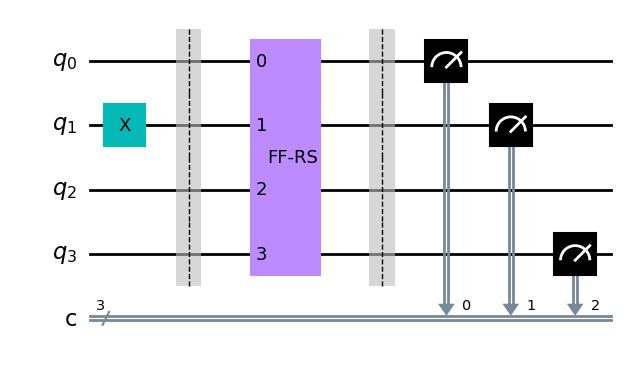

set -->  0  last -->  1  reset -->  0  counts -->  {'010': 1024}


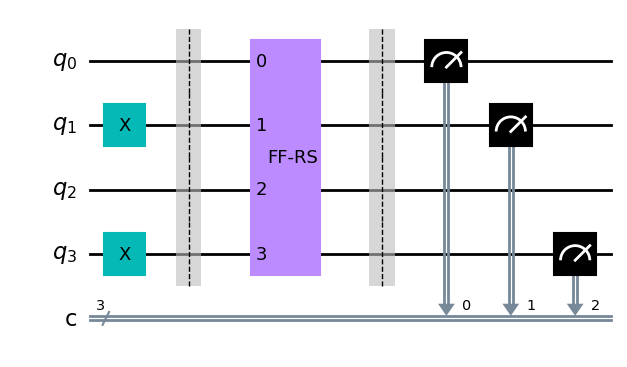

set -->  0  last -->  1  reset -->  1  counts -->  {'100': 1024}


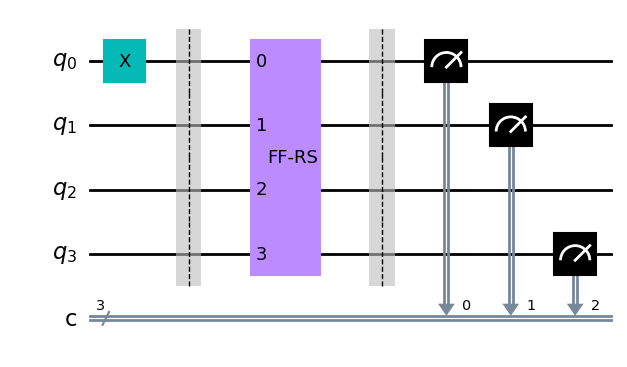

set -->  1  last -->  0  reset -->  0  counts -->  {'011': 1024}


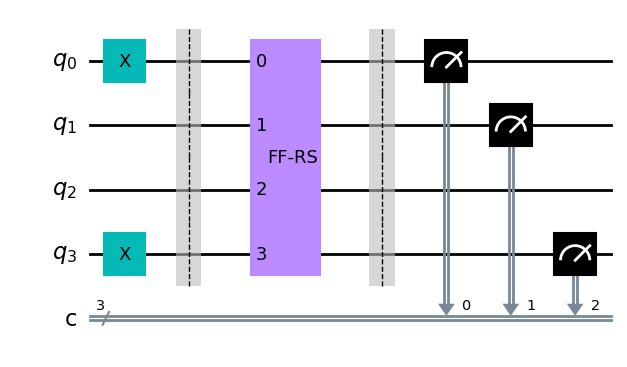

set -->  1  last -->  0  reset -->  1  counts -->  {'111': 1024}


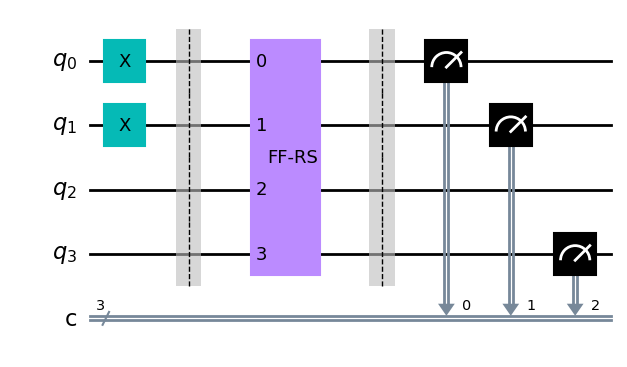

set -->  1  last -->  1  reset -->  0  counts -->  {'011': 1024}


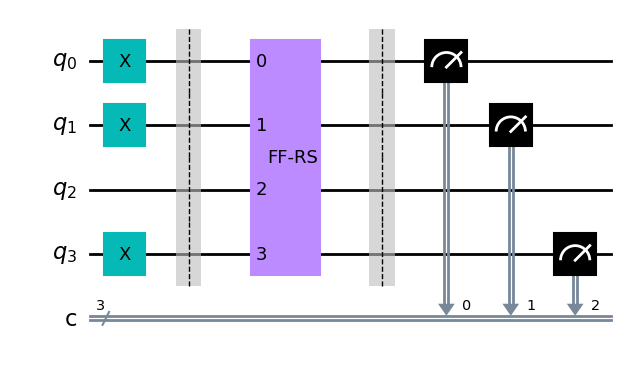

set -->  1  last -->  1  reset -->  1  counts -->  {'101': 1024}


In [118]:
from itertools import product

for set_bit, last_bit, reset_bit in product(range(2), repeat=3):
    qc = QuantumCircuit(4, 3)
    
    if(set_bit):
        qc.x(0)
    
    if(last_bit):
        qc.x(1)
        
    if(reset_bit):
        qc.x(3)
        
    qc.barrier()
    qc.append(FFRS, range(4))
    qc.barrier()
    qc.measure([0, 1, 3], range(3))
    
    display(qc.draw("mpl"))
    print('set --> ', set_bit, ' last --> ', last_bit, ' reset --> ', reset_bit, ' counts --> ', sim.run(transpile(qc, sim)).result().get_counts())
    
    